In [1]:
# see: https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
df = pd.read_csv('dpe-france.csv')
df.head(3)

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,result_label,result_score,tr001_modele_dpe_type_libelle,tr002_type_batiment_description
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.134409,5.553940,3 Impasse du Tilleul 01430 Saint-Martin-du-Frêne,0.94,Vente,Maison Individuelle
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,43.320718,6.287329,7 Rue de la Treille 83590 Gonfaron,0.95,Vente,Maison Individuelle
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,46.661391,2.686369,7 Route du Bois Jaubin 03360 Saint-Bonnet-Tron...,0.68,Vente,Maison Individuelle


In [4]:
df.shape

(10000, 15)

In [5]:
df.dtypes

nom_methode_dpe                     object
version_methode_dpe                 object
date_etablissement_dpe              object
consommation_energie               float64
classe_consommation_energie         object
estimation_ges                     float64
classe_estimation_ges               object
annee_construction                   int64
surface_thermique_lot              float64
latitude                           float64
longitude                          float64
result_label                        object
result_score                       float64
tr001_modele_dpe_type_libelle       object
tr002_type_batiment_description     object
dtype: object

In [6]:
s = (df.dtypes =='object')
object_cols = list(s[s].index)

In [7]:
object_cols

['nom_methode_dpe',
 'version_methode_dpe',
 'date_etablissement_dpe',
 'classe_consommation_energie',
 'classe_estimation_ges',
 'result_label',
 'tr001_modele_dpe_type_libelle',
 'tr002_type_batiment_description']

In [8]:
df_num = df.drop(object_cols, axis = 1)

In [9]:
df_num.head()

,consommation_energie,estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,result_score
0,132.0,29.0,5200,190.0,46.134409,5.553940,0.94
1,0.0,0.0,1947,42.0,43.320718,6.287329,0.95
2,326.0,18.0,2006,107.0,46.661391,2.686369,0.68
3,326.0,14.0,1948,90.0,43.950393,6.811277,0.94
4,221.0,3.0,2006,78.2,44.801994,6.583455,0.64


In [10]:
df_num = df_num.rename(columns={'consommation_energie': 'consEn', 'estimation_ges':'estimGes',\
                                'annee_construction':'anneeCons', 'surface_thermique_lot': 'surfTherm', \
                               'result_score':'score'})
df_num.columns

Index(['consEn', 'estimGes', 'anneeCons', 'surfTherm', 'latitude', 'longitude',
       'score'],
      dtype='object')

In [11]:
df_num.describe()

,consEn,estimGes,anneeCons,surfTherm,latitude,longitude,score
count,10000.000000,10000.000000,10000.000000,9985.000000,9899.000000,9899.000000,9899.000000
mean,230.238654,29.550557,1914.303400,143.428016,46.575164,2.773067,0.757356
std,167.102059,43.951803,324.611172,543.962606,2.431765,3.009830,0.168209
min,-25.460000,-24.000000,-1.000000,0.000000,-21.166860,-61.034873,0.180000
25%,142.665000,8.000000,1947.000000,62.660000,44.727292,0.882372,0.650000
50%,219.930000,17.610000,1960.000000,87.500000,46.945339,2.523146,0.790000
75%,307.000000,44.000000,1988.000000,120.000000,48.557367,4.892446,0.930000
max,6997.000000,2326.330000,7000.000000,25270.000000,51.050349,55.495400,0.970000


In [12]:
df_num['clasCons'] = df['classe_consommation_energie']
df_num['clasGes'] = df['classe_estimation_ges']

In [13]:
df_num['clasCons'].unique()

array(['C', 'N', 'E', 'D', 'F', 'A', 'B', 'G', 'I'], dtype=object)

In [14]:
#frequency of each classe
df_num['clasCons'].value_counts()

D    2761
E    2606
F    1264
N    1165
C    1149
G     588
B     269
A     197
I       1
Name: clasCons, dtype: int64

In [15]:
classes = df_num['clasGes'].unique()
print(classes)
print(len(classes))

['D' 'N' 'C' 'A' 'E' 'G' 'B' 'F']
8


In [16]:
df_num.groupby('clasCons').consEn.describe()

,count,mean,std,min,25%,50%,75%,max
clasCons,,,,,,,,
A,197.0,10.188782,17.175184,-25.46,0.0000,0.00,23.00,50.32
B,269.0,72.565353,13.486420,38.00,61.0000,74.07,80.63,181.00
C,1149.0,129.035326,23.512215,91.00,114.0000,129.00,142.00,370.00
D,2761.0,195.940232,26.053920,151.00,175.9400,197.30,215.62,524.96
E,2606.0,281.493929,32.775648,231.00,255.1575,280.00,306.00,758.51
F,1264.0,390.022793,42.702303,331.00,356.0000,386.00,421.00,915.00
G,588.0,601.035986,316.870185,0.24,491.7625,537.34,627.25,6997.00
I,1.0,872.290000,NaN,872.29,872.2900,872.29,872.29,872.29
N,1165.0,9.238850,58.851267,0.00,0.0000,0.00,0.00,1779.46


## Histogram

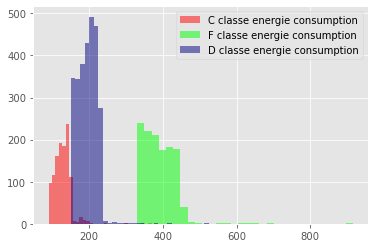

In [17]:
m=plt.hist(df_num[df_num['clasCons'] == 'C'].consEn, bins=30, label='C classe energie consumption', fc = (1,0,0,0.5))
b=plt.hist(df_num[df_num['clasCons'] == 'F'].consEn, bins=30, label='F classe energie consumption', fc = (0,1,0,0.5))
c=plt.hist(df_num[df_num['clasCons'] == 'D'].consEn, bins=30, label='D classe energie consumption', fc = (0,0,0.5,0.5))
_ =plt.legend()

## Data outlier

### 1 Outlier anneeCons

In [18]:
df_num['anneeCons'].describe()

count    10000.000000
mean      1914.303400
std        324.611172
min         -1.000000
25%       1947.000000
50%       1960.000000
75%       1988.000000
max       7000.000000
Name: anneeCons, dtype: float64

In [19]:
anneeCons = np.array(df_num['anneeCons'])
val_above_ub = sum(anneeCons > 2020)
val_above_ub

5

In [20]:
#delete all rows with year > 2020
#df = df.drop(df[df.score < 50].index)
df_num1 = df_num.drop(df_num[df_num['anneeCons'] > 2020].index)
df_num1['anneeCons'].max()

2013

In [21]:
df_num['anneeCons'].min()

-1

(1400.0, 2020.0)

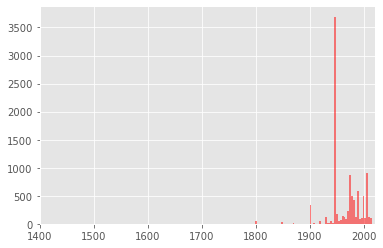

In [22]:
y = plt.hist(anneeCons, bins=2000, fc = (1,0,0,0.5))
plt.xlim([1400, 2020])
#plt.ylim([0, 500])

In [23]:
#we take data from after the world war
df_num1 = df_num1.drop(df_num[df_num['anneeCons'] < 1945].index)
df_num1['anneeCons'].min()

1945

In [24]:
transform = lambda x : x*2
annee_toy = df_num1['anneeCons'].apply(transform)
annee_toy.head(3)

1    3894
2    4012
3    3896
Name: anneeCons, dtype: int64

In [25]:
# or
df_num1['anneeCons'].apply(lambda x : x*2).head(3)

1    3894
2    4012
3    3896
Name: anneeCons, dtype: int64

### 2 Outliers Consommation Energie

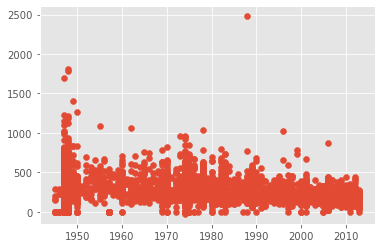

In [26]:
consEn = df_num1['consEn']
plt.scatter(df_num1['anneeCons'], consEn)

In [27]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

In [32]:
consEn = df_num1['consEn']
desc_C = consEn.describe()
desc_C

count    9013.000000
mean      235.393766
std       150.785537
min       -25.460000
25%       149.000000
50%       223.000000
75%       311.000000
max      2478.260000
Name: consEn, dtype: float64

(0.0, 0.005)

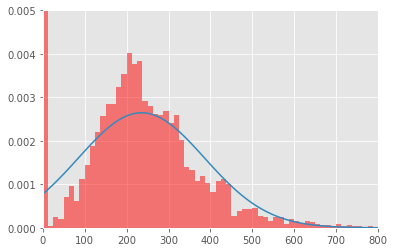

In [29]:
#histogram energy consumption and pdf
from scipy.stats import norm

plt.figure
_ = plt.hist(df_num1['consEn'], bins=200, density = True, fc = (1,0,0,0.5))
_ = plt.xlim(0, 1500)
x = np.linspace(0, 1000, 100)
mu = 235.40
std = 150.79
_ = plt.plot(x, norm.pdf(x, mu, std))
plt.xlim(0, 800)
plt.ylim(0, 0.005)

In [30]:
#Conclusion for now: distribution is random enough
#delete rows consEn with mu - 3 * std < consEn < mu + 3 * std

In [34]:
Q1 = desc_C[4]
Q3 = desc_C[6]
IQR = Q3 - Q1
lowerb = Q1 - 1.5 * IQR
upperb = Q3 + 1.5 * IQR

In [37]:
print("Anything outside this range is an outlier: (", lowerb ,",", upperb,")")

Anything outside this range is an outlier: ( -94.0 , 554.0 )


In [38]:
df_num.columns

Index(['consEn', 'estimGes', 'anneeCons', 'surfTherm', 'latitude', 'longitude',
       'score', 'clasCons', 'clasGes'],
      dtype='object')

## Label or get dummy
To label or to get dummies. This depends on the cardinality and ordinality of the data

## Relationship between variables

<Figure size 1080x720 with 0 Axes>

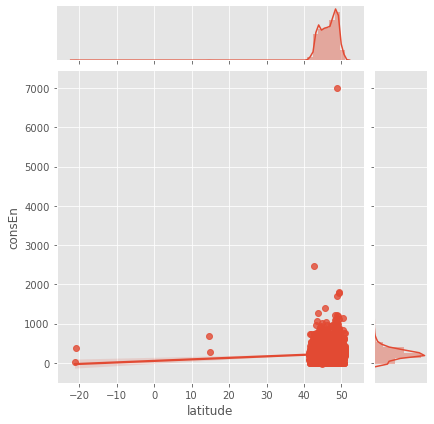

In [39]:
plt.figure(figsize = (15, 10))
_ = sns.jointplot(df_num.latitude, df_num.consEn, kind='regg')
plt.show()

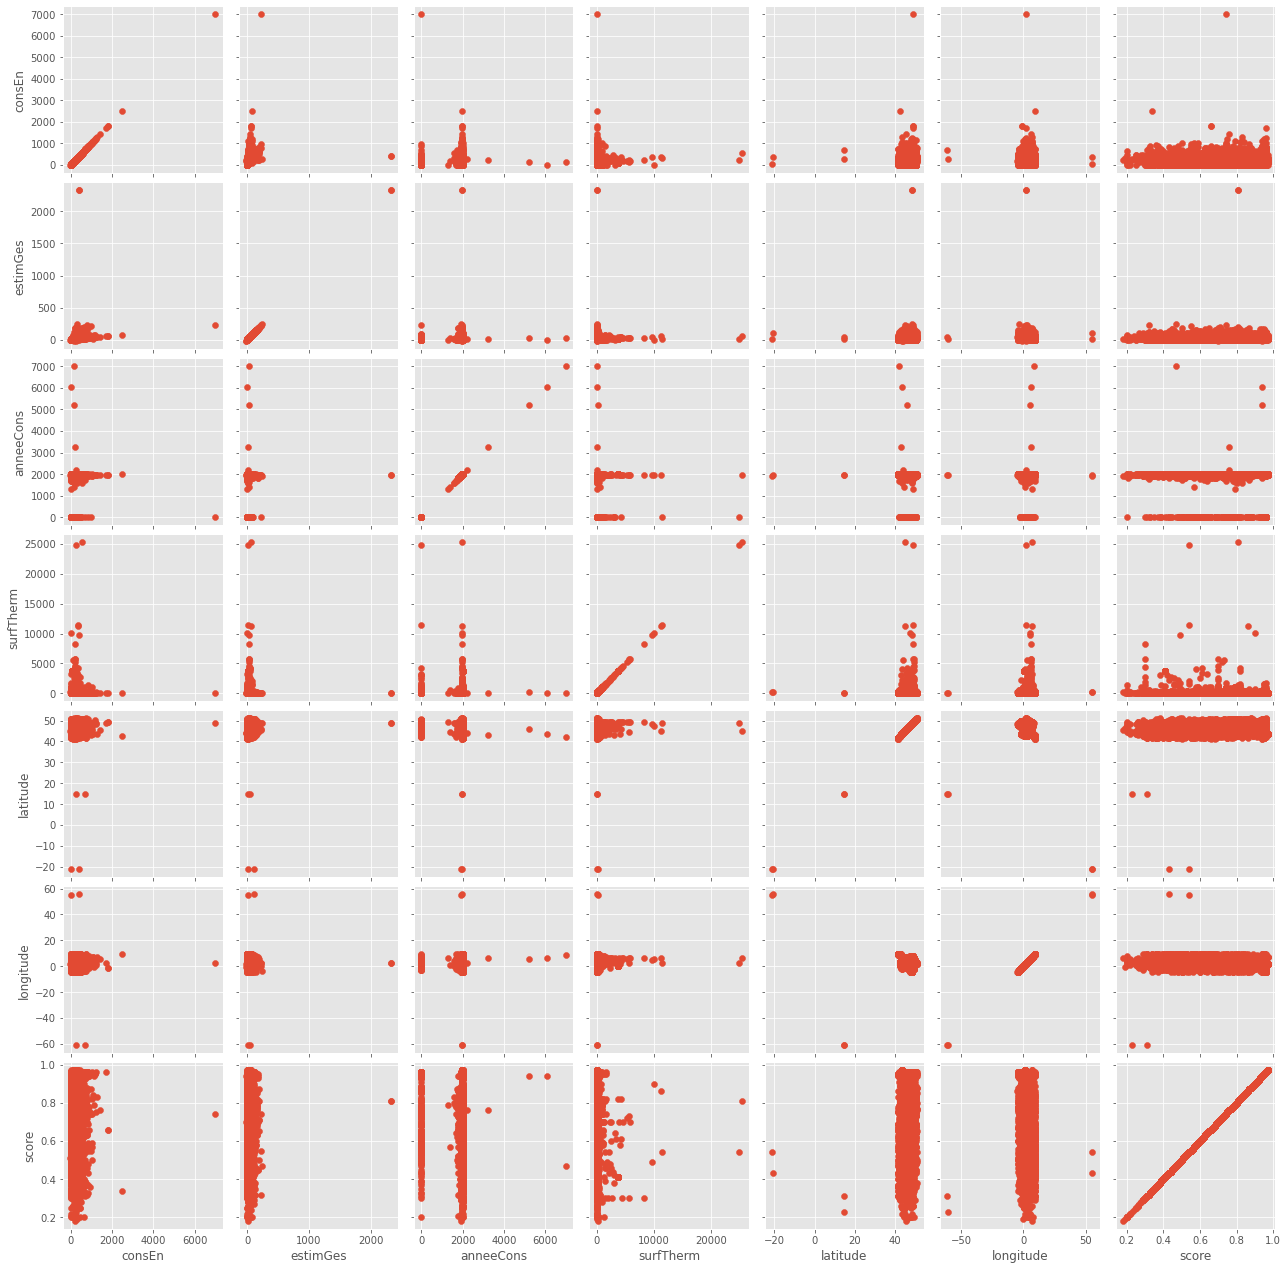

In [40]:
df_num1=df_num.drop(['clasCons', 'clasGes'], axis = 1)
g = sns.PairGrid(df_num1)
g = g.map(plt.scatter)

## Exploratory Data Aanalysis

In [41]:
def get_top_10(group):
    return group.sort_values(by='consEn', ascending = False)[:10]

In [42]:
df_num1.groupby(['clasCons']).apply(get_top_10)

KeyError: 'clasCons'

In [ ]:
len(df_num1.groupby(['clasCons']))

In [ ]:
mean_cons = df_num1.groupby(['clasCons']).mean()
mean_cons